In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
import xarray as xr
import os 
import zipfile

In [ ]:

library(dplyr)
library(readxl)
library(tidyverse)

xl_folder <- "/Users/justinmaynard/Documents/GitHub/assetraMP/examples/pjm_2023_test/pjm_data/load_forecasts/projections_raw/"
out_folder <- "/Users/justinmaynard/Documents/GitHub/assetraMP/examples/pjm_2023_test/pjm_data/load_forecasts/csvs_updated/"

files <- list.files(xl_folder, pattern = ".xlsx", recursive = TRUE)


strsplit(files[1], split = "/")[[1]][2]

#open each excel file, and write out with change extention
for (i in files){
#print(i)
readxl::read_excel(paste0(xl_folder, i)) %>%
write.csv(., paste0(out_folder ,gsub(".xlsx", ".csv", strsplit(i, split = "/")[[1]][2])))
}

In [15]:
p = Path(".")
root_folder = p.cwd().parent
root_folder
data_folder = root_folder / 'pjm_2023_test' / 'pjm_data'
data_folder
scripts_folder = root_folder/ 'pjm_2023_test'
load_forecast_folder =  root_folder / 'pjm_2023_test' / 'pjm_data' / 'load_forecasts' / 'csvs_updated/'


git_data_folder = root_folder  / 'pjm_run'/ 'git_data'
gen_data_folder = git_data_folder / 'gen_forecasts' 
scripts_foler = root_folder/ 'scripts'
outside_data_folder = root_folder / 'outside_data'
gen_data_folder = git_data_folder / 'gen_forecasts'
historical_load_data = git_data_folder / 'historical_load'
load_forecast_folder_run = git_data_folder / 'load_forecasts_updated'

new_dir =  root_folder / 'pjm_2023_test' / 'pjm_data' / 'load_forecasts' / 'csvs_updated_processed/'


In [5]:
from pathlib import Path

main_dir = load_forecast_folder
# Iterate through folders and files

for file in main_dir.glob("*.csv"):  # Match only csv files
    #print(file)
    file_name_no_ext = file.stem
    new_file_name = file_name_no_ext + ".csv"
    print(new_file_name)
    df = pd.read_csv(file)
    df['AverageLoad'] = df.iloc[:, 4:].mean(axis=1)
    columns_to_drop = [col for col in df.columns if col not in ('forecast_date', 'current_hour_ending', 'AverageLoad')]
    df.drop(columns=columns_to_drop, inplace=True)
    df.to_csv(new_dir/new_file_name, index=False)

VEPCO_Hourly_Forecast_2039.csv
APS_Hourly_Forecast_2041.csv
PENLC_Hourly_Forecast_2040.csv
PS_Hourly_Forecast_2028.csv
PL_Hourly_Forecast_2043.csv
ATSI_Hourly_Forecast_2026.csv
DPL_Hourly_Forecast_2032.csv
DPL_Hourly_Forecast_2026.csv
ATSI_Hourly_Forecast_2032.csv
DAYTON_Hourly_Forecast_2032.csv
AEP_Hourly_Forecast_2031.csv
AEP_Hourly_Forecast_2025.csv
DAYTON_Hourly_Forecast_2026.csv
AE_Hourly_Forecast_2045.csv
RECO_Hourly_Forecast_2042.csv
RECO_Hourly_Forecast_2043.csv
AE_Hourly_Forecast_2044.csv
DAYTON_Hourly_Forecast_2027.csv
DAYTON_Hourly_Forecast_2033.csv
AEP_Hourly_Forecast_2030.csv
DPL_Hourly_Forecast_2027.csv
ATSI_Hourly_Forecast_2033.csv
ATSI_Hourly_Forecast_2027.csv
DPL_Hourly_Forecast_2033.csv
PL_Hourly_Forecast_2042.csv
PS_Hourly_Forecast_2029.csv
PENLC_Hourly_Forecast_2041.csv
APS_Hourly_Forecast_2040.csv
VEPCO_Hourly_Forecast_2038.csv
APS_Hourly_Forecast_2042.csv
DUKE_Hourly_Forecast_2038.csv
PENLC_Hourly_Forecast_2043.csv
PECO_Hourly_Forecast_2039.csv
PL_Hourly_Forecast_

In [8]:
pd.read_csv(new_dir/'VEPCO_Hourly_Forecast_2032.csv')

,forecast_date,current_hour_ending,AverageLoad
0,2032-01-01,1,28402.272953
1,2032-01-01,2,28162.235732
2,2032-01-01,3,28077.555831
3,2032-01-01,4,28088.225806
4,2032-01-01,5,28273.550868
...,...,...,...
8779,2032-12-31,20,32191.471464
8780,2032-12-31,21,31790.302730
8781,2032-12-31,22,31353.258065
8782,2032-12-31,23,30992.349876


In [11]:
for file in new_dir.glob("*.csv"):
    # Extract the year from the file name
    year = int(file.stem.split('_')[-1])
    print(year)

2039
2041
2040
2028
2043
2026
2032
2026
2032
2032
2031
2025
2026
2045
2042
2043
2044
2027
2033
2030
2027
2033
2027
2033
2042
2029
2041
2040
2038
2042
2038
2043
2039
2040
2045
2031
2025
2031
2025
2025
2026
2032
2031
2041
2040
2033
2030
2027
2030
2030
2024
2044
2041
2038
2042
2039
2043
2029
2045
2040
2028
2034
2034
2034
2037
2044
2043
2042
2045
2035
2036
2035
2035
2029
2041
2044
2028
2044
2028
2045
2043
2039
2037
2037
2034
2037
2040
2041
2035
2036
2036
2036
2038
2042
2044
2029
2045
2036
2037
2034
2031
2025
2028
2045
2045
2026
2032
2035
2034
2033
2027
2044
2044
2029
2030
2035
2036
2037
2035
2038
2029
2028
2034
2028
2026
2028
2037
2032
2045
2031
2028
2025
2036
2037
2029
2030
2044
2033
2036
2029
2027
2029
2035
2029
2028
2039
2034
2030
2029
2025
2031
2039
2038
2039
2026
2032
2039
2037
2043
2043
2040
2027
2033
2039
2034
2038
2035
2032
2026
2042
2041
2042
2036
2038
2033
2027
2038
2039
2038
2030
2028
2025
2031
2027
2033
2032
2026
2031
2034
2025
2040
2039
2043
2040
2030
2037
2036
2025
2031
2042


In [12]:
import pandas as pd

# Create a dictionary to hold dataframes for each year
yearly_data = {}

# Iterate through the files in the processed directory
for file in new_dir.glob("*.csv"):
    # Extract the year from the file name
    year = int(file.stem.split('_')[-1])
    
    # Check if the year is within the desired range
    if 2024 <= year <= 2045:
        # Read the CSV file
        df = pd.read_csv(file, usecols=["AverageLoad"])

        df['datetime_beginning_ept'] = pd.date_range(start=f'{year}-01-01 00:00:00', periods=len(df), freq='h')
        df.set_index('datetime_beginning_ept', inplace=True)
        df.rename(columns={"AverageLoad": "mw"}, inplace=True)

        # Add the data to the corresponding year in the dictionary
        if year not in yearly_data:
            yearly_data[year] = df
        else:
            yearly_data[year] = (
                pd.concat([yearly_data[year].reset_index(), df.reset_index()])
                .groupby("datetime_beginning_ept", as_index=False)
                .sum()
                .set_index("datetime_beginning_ept")
            )
# Save the combined data for each year as a new CSV file
for year, data in yearly_data.items():
    combined_file_name = f"combined_load_{year}.csv"
    data.to_csv(load_forecast_folder_run / combined_file_name, index=True)

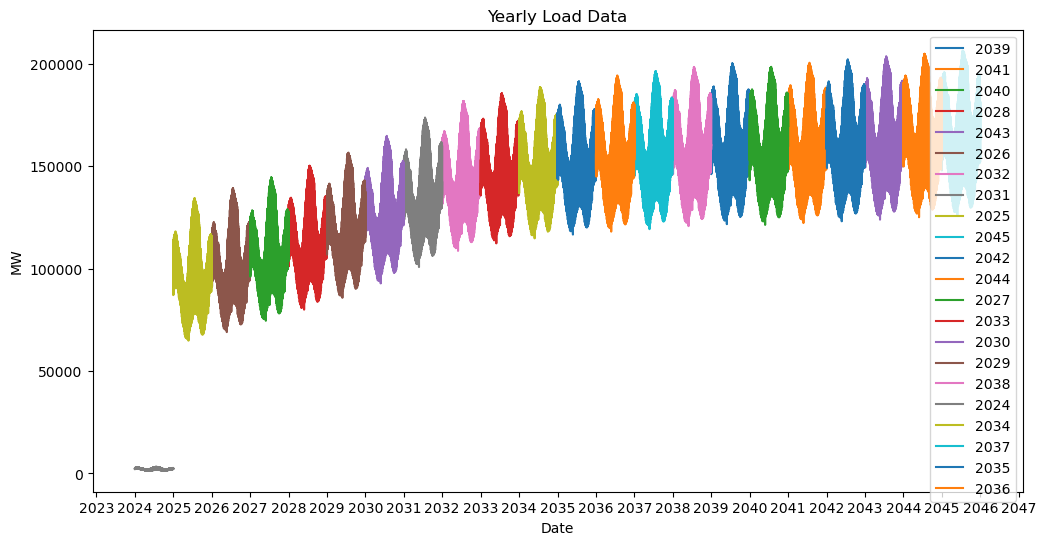

In [13]:
#graph all the years of demand data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
# Plot each year's data
for year, data in yearly_data.items():
    ax.plot(data.index, data['mw'], label=str(year))
# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('MW')
ax.set_title('Yearly Load Data')
# Add legend
ax.legend()
# Show the plot
plt.show()

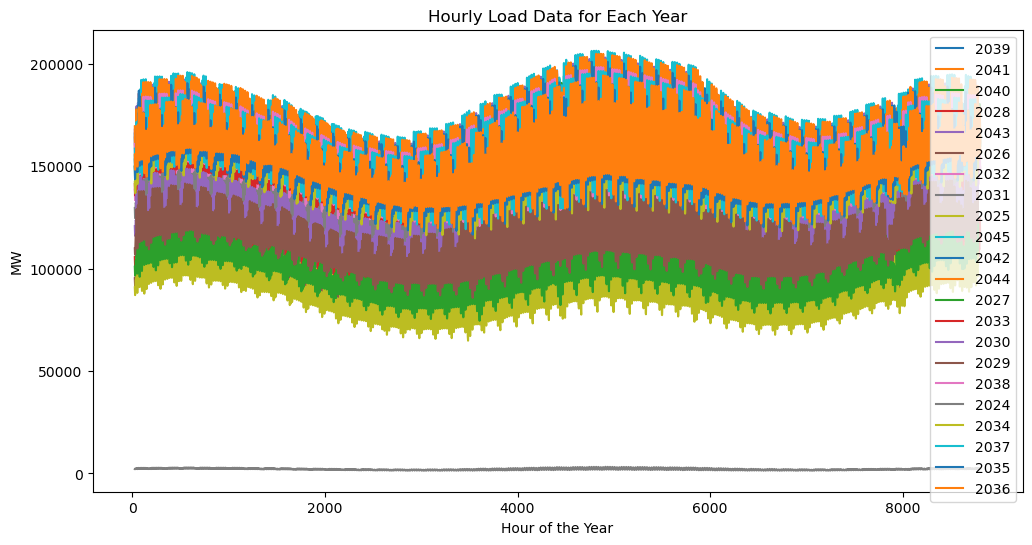

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each year's data
for year, data in yearly_data.items():
    ax.plot(data.index.dayofyear * 24 + data.index.hour, data['mw'], label=str(year))

# Formatting the x-axis 
ax.set_xlabel('Hour of the Year')
ax.set_ylabel('MW')
ax.set_title('Hourly Load Data for Each Year')
ax.legend()

# Show the plot
plt.show()